# Importing Dependencies


In [1]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16027, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 16027 (delta 3), reused 12 (delta 1), pack-reused 16008
Receiving objects: 100% (16027/16027), 14.56 MiB | 26.06 MiB/s, done.
Resolving deltas: 100% (11015/11015), done.


In [2]:
%cd yolov5
%pip install -qr requirements.txt

/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.5/612.5 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.3 MB/s eta 0:00:00


In [ ]:
pip install -q kaggle

In [6]:
pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 45.1 MB/s eta 0:00:00


In [ ]:
from google.colab import files

files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"deepti13","key":"b16a64e7fb0673d875d6c33a9fe58d6b"}'}

In [ ]:
mkdir ~/.kaggle

In [ ]:
cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                                   title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                      25KB  2023-04-13 09:55:16          40107       1155  1.0              
tawfikelmetwally/automobile-dataset                                   Car information dataset                            6KB  2023-05-28 18:26:48           6897        178  0.9411765        
fatihb/coffee-quality-data-cqi                                        Coffee Quality Data (CQI May-2023)                22KB  2023-05-12 13:06:39           8575        180  1.0              
mohithsairamreddy/salary-data                

In [ ]:
! kaggle datasets download Aerial Images Object Detection - YOLO and PyTorch

usage: kaggle
       [-h]
       [-v]
       {competitions,c,datasets,d,kernels,k,config}
       ...
kaggle: error: unrecognized arguments: Images Object Detection - YOLO and PyTorch


In [35]:
from matplotlib import pyplot as plt
import numpy as np
import rasterio
from rasterio.windows import Window
from rasterio.plot import show
import math
import numpy as np
import cv2

In [3]:
import torch
from yolov5 import utils
display = utils.notebook_init()

YOLOv5 🚀 v7.0-189-ga453a45 Python-3.10.12 torch-2.0.1+cu118 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/107.7 GB disk)


In [4]:
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Training Model

In [8]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5x6', pretrained=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 v7.0-189-ga453a45 Python-3.10.12 torch-2.0.1+cu118 CPU

100%|██████████| 270M/270M [00:01<00:00, 157MB/s]

Fusing layers... 
YOLOv5x6 summary: 574 layers, 140730220 parameters, 0 gradients
Adding AutoShape... 


In [29]:
img = '/content/ORTO_2122-2_RGB_5000_v1.jp2'

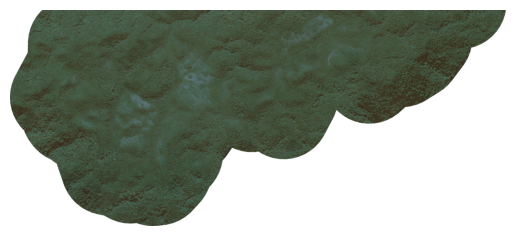

In [37]:
img_color = cv2.imread(img)
plt.imshow(img_color)
plt.axis("off")
plt.show()

In [30]:
dataset = rasterio.open(img)

In [31]:
square_size = 240

In [32]:
math.ceil(dataset.width / square_size), math.ceil(dataset.height / square_size)

(29, 13)

In [33]:
%matplotlib inline

# Aerial Object Detection


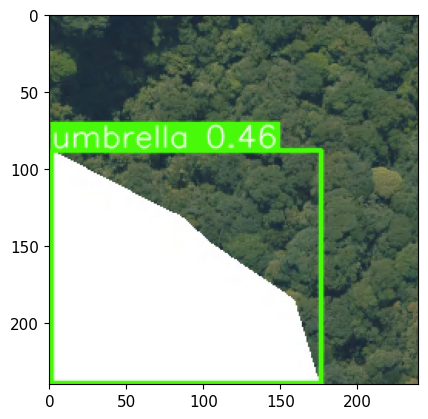

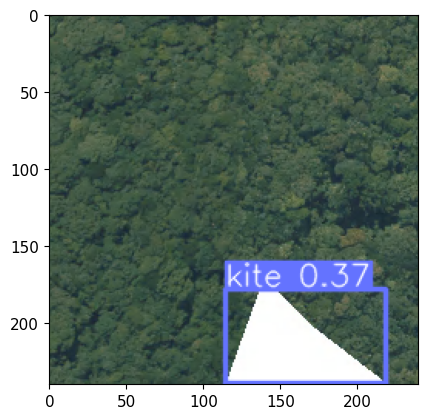

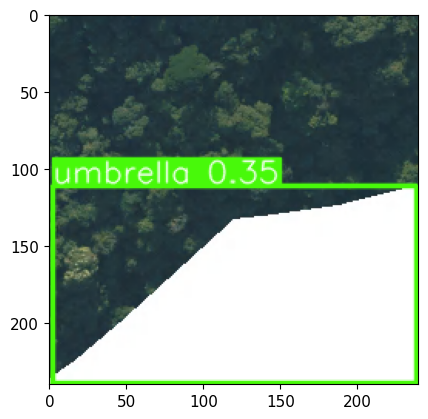

In [34]:
for i in np.arange(math.ceil(dataset.width / square_size)):
    for j in np.arange(math.ceil(dataset.height / square_size)):
        data = dataset.read(window=Window(square_size * i, square_size * j, square_size, square_size))
        results = model(data)
        if len(results.xywh[0]) > 0:
            plt.imshow(np.squeeze(results.render()))
            plt.show()